# BeerAdvocate

In [32]:
import pandas as pd
import utils
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
importlib.reload(utils)


<module 'utils' from 'c:\\Users\\jon\\Desktop\\EPFL\\MA1\\ADA\\pro_med\\ada-2024-project-mediterranean\\src\\data\\utils.py'>

## Files loading

In [2]:
beers_adv = pd.read_csv("../../data/Original/BeerAdvocate/beers.csv", sep=",")
breweries_adv = pd.read_csv("../../data/Original/BeerAdvocate/breweries.csv", sep=",")
users_adv = pd.read_csv("../../data/Original/BeerAdvocate/users.csv", sep=",")

# Data processing

### Beers

In [3]:
utils.dataset_information(beers_adv, "Beers_BA")



########################################################
We are starting analysing dataset Beers_BA
- Dimension of starting dataset: (280823, 15)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id           beer_name  brewery_id            brewery_name  \
0   166064    Nashe Moskovskoe       39912  Abdysh-Ata (Абдыш Ата)   
1   166065     Nashe Pivovskoe       39912  Abdysh-Ata (Абдыш Ата)   
2   166066  Nashe Shakhterskoe       39912  Abdysh-Ata (Абдыш Ата)   
3   166067  Nashe Zhigulevskoe       39912  Abdysh-Ata (Абдыш Ата)   
4   166063              Zhivoe       39912  Abdysh-Ata (Абдыш Ата)   

             style  nbr_

In [4]:
utils.ensure_col_types(beers_adv,
                       ['beer_id', 'brewery_id', 'nbr_ratings', 'nbr_reviews', 'nbr_matched_valid_ratings'],
                       ['abv'],
                       ['beer_name', 'brewery_name', 'style'])

In [5]:
beers_adv.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [28]:
beers_adv_filt = beers_adv[(beers_adv['nbr_ratings'] != 0) & (beers_adv['nbr_reviews'] != 0)].copy()

In [29]:
beers_adv_filt['nbr_ratings'].describe()

count    166649.000000
mean         49.216653
std         298.336124
min           1.000000
25%           2.000000
50%           5.000000
75%          17.000000
max       16509.000000
Name: nbr_ratings, dtype: float64

In [30]:
beers_adv_filt['nbr_reviews'].describe()

count    166649.000000
mean         15.539163
std          88.846266
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3899.000000
Name: nbr_reviews, dtype: float64

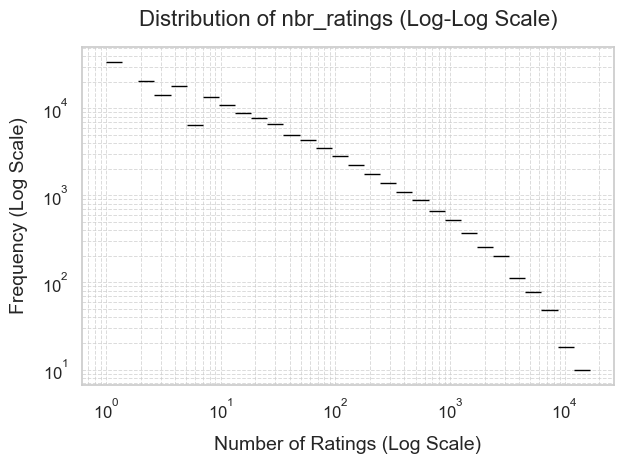

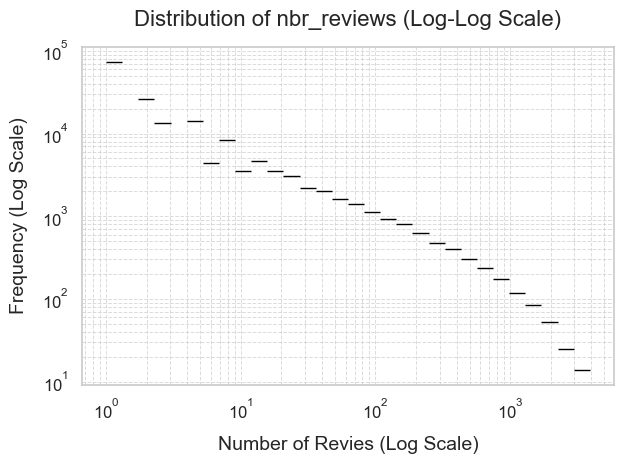

In [31]:
sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_ratings'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Ratings (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_ratings (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_reviews'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Revies (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_reviews (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

### Breweries

In [6]:
utils.dataset_information(breweries_adv, "Breweries_BA")



########################################################
We are starting analysing dataset Breweries_BA
- Dimension of starting dataset: (16758, 4)
- Columns of dataset:  Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: False
Head: 
       id    location                    name  nbr_beers
0  39912  Kyrgyzstan  Abdysh-Ata (Абдыш Ата)          5
1  39913  Kyrgyzstan             Arpa (АРПА)          1
2  39914  Kyrgyzstan               Bear Beer          4
3  39915  Kyrgyzstan             Blonder Pub          4
4  39916  Kyrgyzstan            Kellers Bier          2


In [7]:
utils.dataset_information(users_adv, "Users_BA")



########################################################
We are starting analysing dataset Users_BA
- Dimension of starting dataset: (153704, 6)
- Columns of dataset:  Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    nbr_ratings  nbr_reviews                user_id        user_name  \
0         7820          465         nmann08.184925          nmann08   
1         2521         2504     stjamesgate.163714      StJamesGate   
2         1797         1143          mdagnew.19527          mdagnew   
3           31           31  helloloser12345.10867  helloloser12345   
4          604          604        cypressbob.3708       cypressbob   

         joined                   location  
0  1.199704e+09  United States, Washington  
1  1.191838e+09    United States, New York  
2  1.116410e+09           Northern Ire

## Processed savings

In [34]:
utils.write_csv_into_directory('../../data/Processed/BeerAdvocate', 'beers_processed.csv', beers_adv_filt)

Dataset successfully saved to ../../data/Processed/BeerAdvocate\beers_processed.csv
